Import

In [12]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
import numpy as np
import tensorflow as tf

from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.optimizers import Adam

from src.models.custom_layers import Attention
MODELS_DIR = os.path.join(PROJECT_ROOT, "results/models")
os.makedirs(MODELS_DIR, exist_ok=True)

Load Procssed Data

In [2]:
from src.data_loader import load_processed_data
processed_folder = os.path.join(PROJECT_ROOT, "data/processed")
X_train, y_train, X_test, y_test, scaler = load_processed_data(processed_folder)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (27980, 48, 1)
y_test shape: (27980, 24, 1)


Model builders

In [3]:
def build_lstm_baseline(input_shape, output_steps):
    inputs = Input(shape=input_shape)
    x = LSTM(64)(inputs)
    outputs = Dense(output_steps)(x)
    return Model(inputs, outputs)

def build_lstm_attention(input_shape, output_steps):
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(inputs)
    x = Attention()(x)
    outputs = Dense(output_steps)(x)
    return Model(inputs, outputs)


Train LSTM Baseline Model

In [4]:
input_shape = X_train.shape[1:]
output_steps = y_train.shape[1]

baseline_model = build_lstm_baseline(input_shape, output_steps)
baseline_model.compile(optimizer=Adam(), loss="mse")

baseline_model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20,batch_size=32)

baseline_model.save(os.path.join(MODELS_DIR, "lstm_baseline.keras"))

print("Baseline model saved!")

Epoch 1/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 163s 45ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 2/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 150s 43ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 3/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 142s 40ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 4/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 153s 44ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 5/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 150s 43ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 6/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 153s 44ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 7/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 245s 56ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 8/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 163s 45ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 9/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 165s 47ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 10/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 187s 43ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 11/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 154s 44ms/step - loss: 0.0041 - val_loss: 0.00

Train LSTM with Attention|

In [5]:
attention_model = build_lstm_attention(input_shape, output_steps)
attention_model.compile(optimizer=Adam(), loss="mse")

attention_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32)
attention_model.save(os.path.join(MODELS_DIR, "lstm_attention.keras"))

print("Attention model saved!")


Epoch 1/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 193s 53ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 2/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 183s 52ms/step - loss: 0.0048 - val_loss: 0.0055
Epoch 3/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 206s 53ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 4/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 251s 71ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 5/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 184s 52ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 6/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 202s 52ms/step - loss: 0.0043 - val_loss: 0.0049
Epoch 7/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 203s 58ms/step - loss: 0.0042 - val_loss: 0.0050
Epoch 8/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 1899s 113ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 9/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 188s 54ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 10/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 241s 69ms/step - loss: 0.0040 - val_loss: 0.0049
Epoch 11/20
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 787s 225ms/step - loss: 0.0040 - val_loss: 

Evaluation

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict with baseline
y_pred_baseline = baseline_model.predict(X_test)
rmse_baseline = np.sqrt(mean_squared_error(y_test.flatten(), y_pred_baseline.flatten()))
mae_baseline = mean_absolute_error(y_test.flatten(), y_pred_baseline.flatten())

# Predict with attention
y_pred_attention = attention_model.predict(X_test)
rmse_attention = np.sqrt(mean_squared_error(y_test.flatten(), y_pred_attention.flatten()))
mae_attention = mean_absolute_error(y_test.flatten(), y_pred_attention.flatten())

print(f"Baseline RMSE: {rmse_baseline:.4f}, MAE: {mae_baseline:.4f}")
print(f"Attention RMSE: {rmse_attention:.4f}, MAE: {mae_attention:.4f}")

875/875 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step
875/875 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step
Baseline RMSE: 0.0700, MAE: 0.0362
Attention RMSE: 0.0713, MAE: 0.0356


In [11]:
import pandas as pd
results = pd.DataFrame({"Model": ["LSTM Baseline", "Attention LSTM"],
                        "RMSE": [rmse_baseline, rmse_attention],
                        "MAE": [mae_baseline, mae_attention]})

results

,Model,RMSE,MAE
0,LSTM Baseline,0.070044,0.036158
1,Attention LSTM,0.071267,0.035565


Plot Predictions

In [8]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, steps_to_plot=200, title="Actual vs Predicted"):
    plt.figure(figsize=(12, 5))
    plt.plot(y_true[:steps_to_plot], label="Actual")
    plt.plot(y_pred[:steps_to_plot], label="Predicted")
    plt.xlabel("Time Steps")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.show()

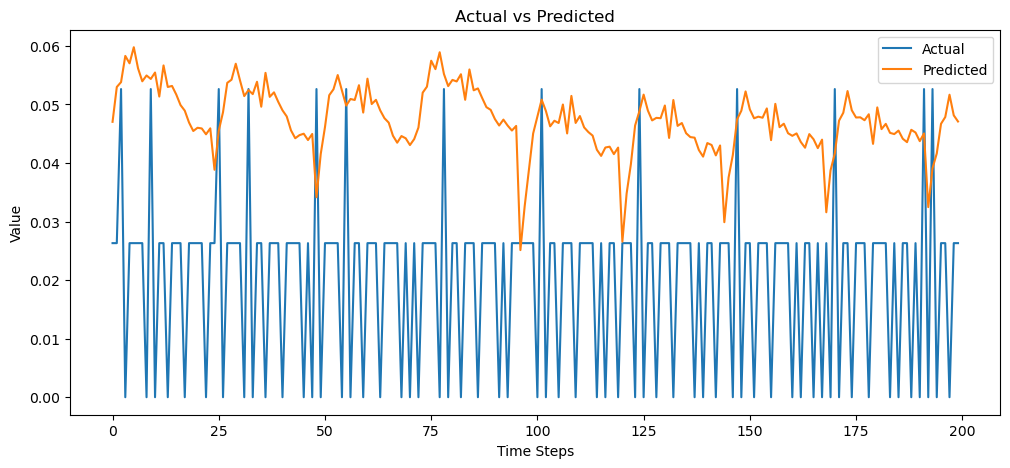

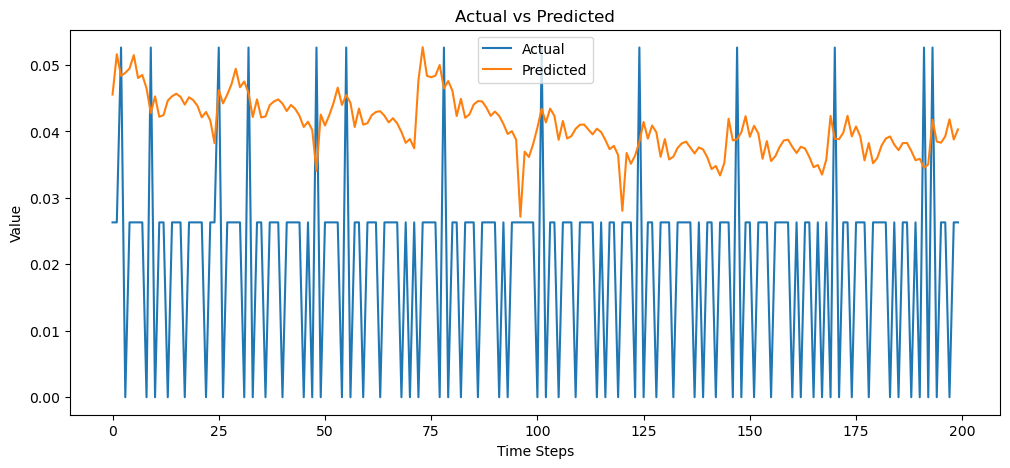

In [9]:
# Plot first 200 steps
plot_predictions(y_test.flatten(), y_pred_baseline.flatten(), steps_to_plot=200)
plot_predictions(y_test.flatten(), y_pred_attention.flatten(), steps_to_plot=200)
